In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [161]:
N=10
x = np.random.uniform(-1, 1, N)
# x = np.sort(x_old)
t = -3.0 * x + 2.0 + np.random.normal(0.0, scale=0.5, size=N)

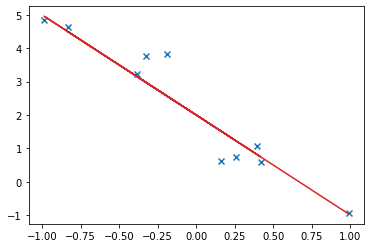

In [162]:
plt.scatter(x,t, marker="x")
plt.plot(x,-3.0*x + 2.0, c="tab:red")
plt.show()

In [163]:
PHI = np.vstack((np.ones(N),x)).T

In [164]:
w_ml = (np.linalg.inv(PHI.T.dot(PHI))).dot(PHI.T.dot(t))
beta_ml = N/np.sum((t-PHI.dot(w_ml))**2)

In [181]:
print(w_ml)
1/beta_ml

[ 2.07569328 -3.21464856]


0.3135131597186633

In [168]:
np.argsort(x)

array([2, 8, 4, 7, 9, 6, 5, 1, 3, 0])

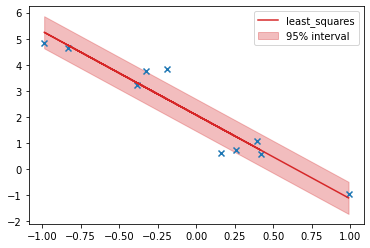

In [171]:
plt.fill_between(np.sort(x),y1=(PHI.dot(w_ml)+stats.norm.ppf(0.975, scale=1/beta_ml))[np.argsort(x)],
                 y2=(PHI.dot(w_ml)-stats.norm.ppf(0.975, scale=1/beta_ml))[np.argsort(x)],
                 color="tab:red", alpha=0.3, label="95% interval")
plt.scatter(x, t, marker="x")
plt.plot(x,PHI.dot(w_ml), c="tab:red", label="least_squares")
plt.legend()
plt.show()

### Bayesian

In [246]:
def prior(w, m0, S0):
    return stats.multivariate_normal.pdf(w,mean=m0, cov=S0)

In [327]:
def likelihood(w, t, PHI, beta):
    prod = 1.0
    for i in range(t.shape[0]):
        cov = np.ones_like(w.dot(PHI[i]))/beta
        prod *= stats.norm.pdf(t[i],loc=w.dot(PHI[i]), scale=cov)
    return prod

In [259]:
m0 = np.array([0,1])
S0 = np.array([[10,0],[0,10]])
w0 = np.linspace(-5,5,100)
w1 = np.linspace(-5,5,100)
w=np.array([[[val0,val1] for val0 in w0] for val1 in w1])

In [345]:
pr = prior(w, m0, S0)

In [346]:
pr.shape

(100, 100)

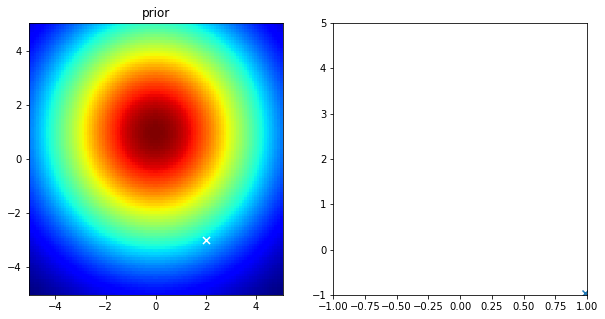

In [347]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.pcolormesh(w0,w1,pr,shading='auto', cmap='jet')
plt.scatter(2, -3, marker='x', c='w', s=50)
plt.title("prior")
plt.subplot(122)
plt.scatter(x[0], t[0], marker='x')
plt.xlim([-1,1])
plt.ylim([-1,5])
plt.show()

In [348]:
from numpy.linalg import inv

In [349]:
beta = 0.3

In [350]:
data_x = x[:2]
data_y = t[:2]

In [351]:
PHI0 = np.vstack((np.ones(data_x.shape[0]),data_x))
S1 = inv(inv(S0) + beta*PHI0.T.dot(PHI0))
m1 = S1.dot(inv(S0).dot(m0) + beta*PHI0.T.dot(data_y))

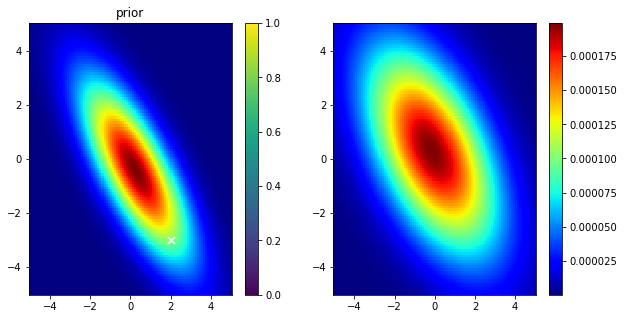

In [355]:
pr1 = prior(w, m1, S1)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.pcolormesh(w0,w1,pr1,shading='auto', cmap='jet')
plt.scatter(2, -3, marker='x', c='w', s=50)
plt.colorbar()
plt.title("prior")
plt.subplot(122)
plt.pcolormesh(w0,w1,lk*pr,shading='auto', cmap='jet')
plt.colorbar()
# plt.scatter(data_x, data_y, marker='x')
# plt.xlim([-1,1])
# plt.ylim([-1,5])
plt.show()

In [336]:
lk = likelihood(w, data_y, PHI0, beta)

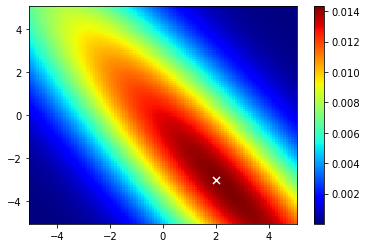

In [337]:
plt.pcolormesh(w0,w1,lk,shading='auto', cmap='jet')
plt.colorbar()
plt.scatter(2, -3, marker='x', c='w', s=50)
plt.show()

In [339]:
lk*pr

array([[2.82973804e-14, 4.87027158e-14, 8.32486570e-14, ...,
        2.73332080e-05, 2.41633619e-05, 2.12149113e-05],
       [4.28646756e-14, 7.34720678e-14, 1.25072576e-13, ...,
        2.77954767e-05, 2.44712781e-05, 2.13971677e-05],
       [6.46436853e-14, 1.10348035e-13, 1.87076920e-13, ...,
        2.81404412e-05, 2.46734116e-05, 2.14854580e-05],
       ...,
       [9.44280932e-06, 1.09103423e-05, 1.25196632e-05, ...,
        1.48688040e-13, 8.82415234e-14, 5.20100259e-14],
       [9.30165969e-06, 1.07031935e-05, 1.22316043e-05, ...,
        9.83253437e-14, 5.81136575e-14, 3.41120687e-14],
       [9.12206011e-06, 1.04534979e-05, 1.18972738e-05, ...,
        6.47333626e-14, 3.81027814e-14, 2.22742096e-14]])